**Implementation of Back Propagation Algorithm from Scratch**

Importing Libraries

In [10]:
import random
import math
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

MLP from scratch

In [11]:
class MLP:
    def __init__(self,inputsize,hiddensize,outputsize,learningrate):
        self.learningrate=learningrate
        self.hiddensize=hiddensize
        self.inputsize=inputsize
        self.outputsize=outputsize
        self.input_layer_bias=[0 for _ in range(hiddensize)]
        self.hidden_layer_bias=[0 for _ in range(outputsize)]    
        self.input_layer_weights=[[random.uniform(0,1) for _ in range(inputsize)] for _ in range(hiddensize)]
        self.hidden_layer_weights=[[random.uniform(0,1) for _ in range(hiddensize)] for _ in range(outputsize)] 
        
    def activation(self,x,type):
        if type=='linear':
            return x 
        elif type=='sigmoid':
            return 1 / (1 + math.exp(-x)) 
    
    def activation_derivative(self,x,type):
        if type=='linear':
            return 1 
        elif type=='sigmoid':
            return x*(1-x) 

    def forwardpass(self,x):
        hidden_layer_output=[]
        for i in range(self.hiddensize):
            temp=self.input_layer_bias[i]
            for j in range(self.inputsize):
                temp+=x.iloc[j]*self.input_layer_weights[i][j]
            hidden_layer_output.append(self.activation(temp,'linear'))  

        final_layer_output=[]
        for i in range(self.outputsize):
            temp=self.hidden_layer_bias[i]
            for j in range(self.hiddensize):
                temp+=hidden_layer_output[j]*self.hidden_layer_weights[i][j]
            final_layer_output.append(self.activation(temp,'sigmoid')) 

        return final_layer_output,hidden_layer_output

    def backward(self,x,output,hidden_output,expected):
        error = [expected[i] - output[i] for i in range(self.outputsize)]

        delta_output_layer = [error[i] * self.activation_derivative(output[i],'sigmoid') for i in range(self.outputsize)]
        
        delta_hidden_layer=[]
        for i in range(self.hiddensize):  
            temp=0
            for j in range(self.outputsize):
               temp+=delta_output_layer[j]*self.activation_derivative(hidden_output[i],'linear')*self.hidden_layer_weights[j][i]
            delta_hidden_layer.append(temp)

        for i in range(self.outputsize):
            for j in range(self.hiddensize):
                self.hidden_layer_weights[i][j]+=self.learningrate*hidden_output[j]*delta_output_layer[i] 

        for i in range(self.hiddensize):
            for j in range(self.inputsize): 
               self.input_layer_weights[i][j]=self.input_layer_weights[i][j]+self.learningrate*x.iloc[j]*delta_hidden_layer[i] 
        
        for i in range(self.hiddensize):
                self.input_layer_bias[i]+=self.learningrate*delta_hidden_layer[i]

        for i in range(self.outputsize):
                self.hidden_layer_bias[i]+=self.learningrate*delta_output_layer[i]  
  

    def loss(self,expected,actual):
        curr=[(expected[i]-actual[i])**2 for i in range(self.outputsize)] 
        return curr
       

    def train(self,input,output,epochs=100):
        loss_to_return=[]
        expected=[]
        for i in range(len(output)):
            temp=[0 for _ in range(self.outputsize)]
            temp[output.iloc[i]]=1
            expected.append(temp)

        for e in range(epochs):
            all_loss=[0 for _ in range(self.outputsize)]
            for i in range(len(input)): 
                final_layer_output,hidden_layer_output=self.forwardpass(input.iloc[i])
                self.backward(input.iloc[i],final_layer_output,hidden_layer_output,expected[i])
                loss=self.loss(expected[i],final_layer_output)
                all_loss=[all_loss[i]+loss[i] for i in range(self.outputsize)]
            meanloss=[all_loss[i]/len(input) for i in range(self.outputsize)]
            
            if e%10==0:
                print(f'Epoch {e + 1}/{epochs}, Loss: {sum(meanloss)/self.outputsize:.4f}') 

            loss_to_return.append(sum(meanloss)/self.outputsize)

        return loss_to_return
                
    def predict(self,input,expected):
        accuracy=0
        for i in range(len(input)):
            temp,_=self.forwardpass(input.iloc[i])
            if temp.index(max(temp))==expected.iloc[i]:
                accuracy+=1
        return accuracy/len(input)

Loading Dataset

In [12]:
dataset=pd.read_csv("Iris.csv")
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Preprocessing

In [13]:
dataset=dataset[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']]
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [14]:
input=dataset.iloc[:,:-1]
inputsize=input.shape[1]
print('Input Size:',inputsize)

Input Size: 4


In [16]:
label_encoder=LabelEncoder()
dataset['Species_encoded']=label_encoder.fit_transform(dataset['Species'])

unique_encoded = label_encoder.classes_

output_size = len(unique_encoded)
print('Output size:', output_size)

Output size: 3


In [20]:
x_train,x_test,y_train,y_test=train_test_split(input,dataset['Species_encoded'],test_size=0.3,random_state=42)

Training

Epoch 1/100, Loss: 0.6005
Epoch 11/100, Loss: 0.0995
Epoch 21/100, Loss: 0.0975
Epoch 31/100, Loss: 0.0925
Epoch 41/100, Loss: 0.0898
Epoch 51/100, Loss: 0.0906
Epoch 61/100, Loss: 0.0898
Epoch 71/100, Loss: 0.0892
Epoch 81/100, Loss: 0.0882
Epoch 91/100, Loss: 0.0874


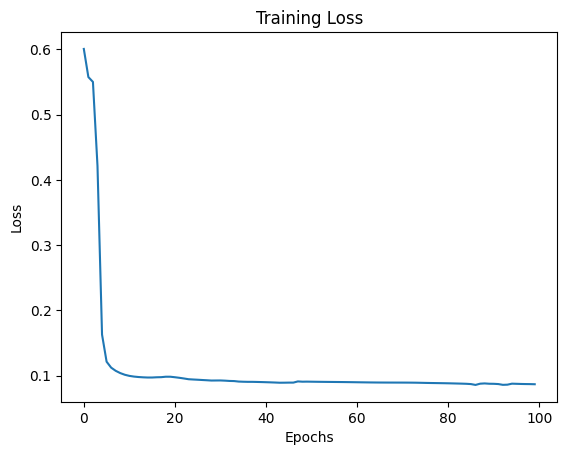

In [21]:
mlp=MLP(inputsize,5,output_size,0.1) 
loss=mlp.train(x_train,y_train,100)

plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

Prediction

In [22]:
print('Accuracy:',mlp.predict(x_test,y_test))

Accuracy: 0.9777777777777777
